# **Final Project**

# **Load Data**

In [ ]:
import pandas as pd
data = pd.read_csv("F1_MexicoGP_data.csv")

# **Pre-Processing**

In [ ]:
!pip install nltk

Imports and Downloads

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')




Stop **Words** + Additional Stop Words

In [ ]:
stop_words = stopwords.words('english')


#additional stop words
stop_words.append('dis')
stop_words.append("y'all")
stop_words.append('dat')
stop_words.append("y'aint")





In [ ]:
tweet = data['tweet']

0       The #BergamoBullet rues Alfa Romeo's “complete...
1       The #BergamoBullet rues Alfa Romeo's “complete...
2       F1: Mexico City Grand Prix, Nov 7, 2021  https...
3       📺 The #MexicoGP attracted an average audience ...
4       The FIA watching Ricciardo crash into Bottas b...
                              ...                        
4487    Wouldn’t it be great if Max took Checo with hi...
4488    If Verstappen really doesn’t care about winnin...
4489    I am already imagining the crowd roar when Che...
4490                   im so nervous  #F1 #MexicoGP #WTF1
4491                   And they swapped.    #MexicoGP #F1
Name: tweet, Length: 4492, dtype: object


Lem and Token

In [ ]:
lemmatizer=WordNetLemmatizer()
for index,row in data.iterrows():
  filter_sentence = []
  sentence = row['tweet']
  words = nltk.word_tokenize(sentence)
  words = [w for w in words if not w in stop_words]
  for word in words:
    filter_sentence.append(lemmatizer.lemmatize(word))


# **Data Analysis and Visualiztion**

# **Topic Modeling**

In [ ]:
# Pip installing libraries 
!pip3 install pyldavis

In [ ]:
# Importing necessary functions from pyLDAvis
from __future__ import print_function
import pyLDAvis 
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode', stop_words = 'english',token_pattern=r'\b[a-zA-Z]{3,}\b'  , lowercase = True, max_df = 0.5, min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(data["tweet"])

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data["tweet"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


In [ ]:
lda_tf = LatentDirichletAllocation(n_components = 20, random_state = 0)
lda_tf.fit(dtm_tf)

lda_tfidf = LatentDirichletAllocation(n_components = 20, random_state = 0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.049977 -0.209928       1        1  7.530340
18     0.150529 -0.010274       2        1  7.506680
15     0.198666 -0.066112       3        1  7.009435
2      0.116319 -0.016360       4        1  6.768516
9     -0.216467  0.025050       5        1  5.674161
12    -0.154824  0.109567       6        1  5.657641
0      0.183264  0.020349       7        1  5.258128
19    -0.096145  0.059860       8        1  5.217852
17     0.244825  0.116765       9        1  5.150777
7      0.016916  0.205970      10        1  4.581647
16    -0.119345  0.180389      11        1  4.534195
8     -0.138565 -0.148377      12        1  4.446382
10    -0.107418 -0.035173      13        1  4.390121
3      0.031810  0.208084      14        1  4.287853
14     0.066922 -0.189026      15        1  4.131957
6     -0.048938 -0.176129      16        1  3.942350
13    -0.053191 -0.068387      17        1  3.900226
5     -0.090364 -0.129468      18        1  3.464754
1     -0.108427  0.057368      19        1  3.310382
4      0.074457  0.065831      20        1  3.236603, topic_info=           Term        Freq        Total Category  logprob  loglift
67        checo  471.000000   471.000000  Default  30.0000  30.0000
328      mexico  984.000000   984.000000  Default  29.0000  29.0000
35       bottas  433.000000   433.000000  Default  28.0000  28.0000
417         red  335.000000   335.000000  Default  27.0000  27.0000
266         lap  382.000000   382.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
220    hamilton   32.207646   650.933621  Topic20  -3.4642   0.4244
245       https   44.754827  2109.210389  Topic20  -3.1353  -0.4222
551  verstappen   24.814409   758.853881  Topic20  -3.7250   0.0103
179      finish    9.138519    81.254757  Topic20  -4.7240   1.2456
23       battle    8.609938    61.581937  Topic20  -4.7835   1.4632

[884 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0        10  0.150415        able
0        14  0.802213        able
1        18  0.152332    absolute
1        19  0.761661    absolute
2         6  0.530663  absolutely
...     ...       ...         ...
590      17  0.060076     youtube
591       7  0.210383        yuki
591      13  0.140255        yuki
591      19  0.280510        yuki
591      20  0.280510        yuki

[1945 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 19, 16, 3, 10, 13, 1, 20, 18, 8, 17, 9, 11, 4, 15, 7, 14, 6, 2, 5])

# **Sentiment Analysis**

In [ ]:
!pip3 install flair
import flair

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
contain_values = data[data['tweet'].str.contains('Mexico')]
sentiment = []

In [ ]:
def senti_score(n):
    s = flair.data.Sentence(n)
    flair_sentiment.predict(s)
    total_sentiment = s.labels[0]
    assert total_sentiment.value in ['POSITIVE', 'NEGATIVE']
    sign = 1 if total_sentiment.value == 'POSITIVE' else -1
    score = total_sentiment.score
    return sign * score

In [ ]:
for count, text in enumerate(contain_values["tweet"]):
  sentiment.append(senti_score(text))

In [ ]:
new_data = data
new_data["Sentiment"] = sentiment

In [ ]:
new_data = pd.read_csv("F1_senti_data.csv")
new_data.head()

Unnamed: 0  ... Sentiment
0          13  ... -0.999457
1          15  ... -0.999241
2          27  ... -0.678016
3          29  ...  0.938024
4          87  ... -0.655291

[5 rows x 6 columns]

# Top 20 Tweets with Positive Sentiment

In [ ]:
largest = new_data.nlargest(20, columns=['Sentiment'])
(largest.head(20)["tweet"])

4094    VAMOS PEREZZ!!! COME ON CHECO! P2 IS SO CLOSE!...
3388    🏁 MAX VERSTAPPEN WINS THE MEXICO CITY GRAND PR...
2561    4 races to go! Lewis, we need the lion to come...
3773    Pierre Gasly, my dude just chilling in P4 this...
4438    I have a hard time believing that it's simply ...
3014    What a Race!!!! Awesome job #redbullracing! @S...
3780    Here comes Perez again. He's in DRS range!  La...
4333    What a move. 👏   Great work from #LS18 as he t...
4296    Come on Perez! Sub one second! DRS!  2nd at ho...
2801    Max increases the lead even more in the WDC, w...
3404    Max Max Super Max. What a race. Get in there M...
3536    #F1 #MexicoGP Last corner... MAX VERSTAPPEN WI...
3537    Take a bow Max, another brilliant drive👏 #Mexi...
1388           #Kimi7 P8 finish! Points! #F1 #MexicoGP 🇲🇽
1482        What a race! #F1 #Verstappen #Checo #MexicoGP
2893    I’ve gotta say, absolutely STUNNING drive from...
2343    #Verstappen ruining #Bottas' fastest lap attem...
3782    #F1: #

# Top 20 Tweets with Negative Sentiment

In [ ]:
smallest = new_data.nsmallest(20, columns=['Sentiment'])
(smallest.head(20)["tweet"])

4006    This is easily the worst #F1 race this season....
2716    Wow, how boring was that??? #MexicoGP #f1 real...
549     Throughout F1 there’s been dreadful seasons by...
3181    I’d like to thank the lord almighty for finall...
320     They actually believe sh*t like this unironica...
3583    In every way possible and with every fibre of ...
1405    Valtteri Bottas finished 15th in the #MexicoGP...
1656    Is the cameraman okay??? Looks like that one h...
3849    Actually fell asleep during this race. Missed ...
1085    @Planet_F1 Nothing to apologise. A mere racing...
1631    Toto Wolff is not happy... #F1 #MexicoGP    ht...
165     "I'm just really disappointed because today we...
3315    Max again 😍  Fucking backmarkers ruined Checo’...
3118    F1: "We want to save tyres to become more sust...
3204    This race sucked all the energy out of me … fl...
984     #VB77 #F1 #MexicanGP No points in Mexico Flag ...
879     Horner wants to avoid "action replay" of 2019 ...
1787    That s

## Question: What were the fan's average sentiment towards the F1 Mexico GP?

In [ ]:
from datetime import datetime

In [ ]:
new_data['datetime'] = new_data['date'] +" "+ new_data['time']

from datetime import datetime

result = []
for val in new_data["datetime"]:
  result.append(str(datetime.strptime(val,'%m/%d/%Y %H:%M:%S')))

new_data["datetime"] = result

In [ ]:
period1 = pd.date_range(start ='11/7/2021 15:00:00', 
         end ='11/9/2021 18:00:00', freq ='1H')
period2 = pd.date_range(start ='11/7/2021 16:00:00', 
         end ='11/9/2021 20:00:00', freq ='1H')


In [ ]:
df = pd.DataFrame(columns = ['datetime', 'Avg Sentiment'])

for p1,p2 in zip(period1,period2):
  n = new_data[new_data.datetime.between(str(p1),str(p2))]
  df.loc[len(df.index)] = [p1,n["Sentiment"].mean()]
 
df

datetime  Avg Sentiment
0  2021-11-07 15:00:00       0.533033
1  2021-11-07 16:00:00       0.568039
2  2021-11-07 17:00:00       0.422649
3  2021-11-07 18:00:00       0.498766
4  2021-11-07 19:00:00       0.416005
5  2021-11-07 20:00:00       0.529139
6  2021-11-07 21:00:00       0.110997
7  2021-11-07 22:00:00       0.311265
8  2021-11-07 23:00:00       0.367583
9  2021-11-08 00:00:00       0.266344
10 2021-11-08 01:00:00       0.356634
11 2021-11-08 02:00:00       0.413150
12 2021-11-08 03:00:00       0.508831
13 2021-11-08 04:00:00       0.279353
14 2021-11-08 05:00:00       0.078806
15 2021-11-08 06:00:00       0.518397
16 2021-11-08 07:00:00       0.240941
17 2021-11-08 08:00:00       0.196925
18 2021-11-08 09:00:00       0.055001
19 2021-11-08 10:00:00       0.451933
20 2021-11-08 11:00:00       0.249061
21 2021-11-08 12:00:00       0.130263
22 2021-11-08 13:00:00      -0.153073
23 2021-11-08 14:00:00       0.684952
24 2021-11-08 15:00:00       0.499986
25 2021-11-08 16:00:00       0.382990
26 2021-11-08 17:00:00       0.175279
27 2021-11-08 18:00:00       0.068174
28 2021-11-08 19:00:00       0.440227
29 2021-11-08 20:00:00       0.459286
30 2021-11-08 21:00:00       0.660229
31 2021-11-08 22:00:00       0.146187
32 2021-11-08 23:00:00       0.980530
33 2021-11-09 00:00:00       0.241731
34 2021-11-09 01:00:00       0.034479
35 2021-11-09 02:00:00       0.418702
36 2021-11-09 03:00:00       0.467727
37 2021-11-09 04:00:00      -0.045754
38 2021-11-09 05:00:00       0.163274
39 2021-11-09 06:00:00       0.331784
40 2021-11-09 07:00:00       0.173180
41 2021-11-09 08:00:00      -0.012998
42 2021-11-09 09:00:00       0.516520
43 2021-11-09 10:00:00       0.170825
44 2021-11-09 11:00:00       0.381099
45 2021-11-09 12:00:00       0.463587
46 2021-11-09 13:00:00       0.725384
47 2021-11-09 14:00:00       0.288494
48 2021-11-09 15:00:00       0.623734
49 2021-11-09 16:00:00      -0.329399
50 2021-11-09 17:00:00       0.440864
51 2021-11-09 18:00:00       0.962794

# This graph displays the fan's average sentiment at each hour over the course of two days. The sentiment was overall postitive

In [ ]:
import plotly.express as px

fig = px.line(df, x='datetime', y="Avg Sentiment")
fig.show()

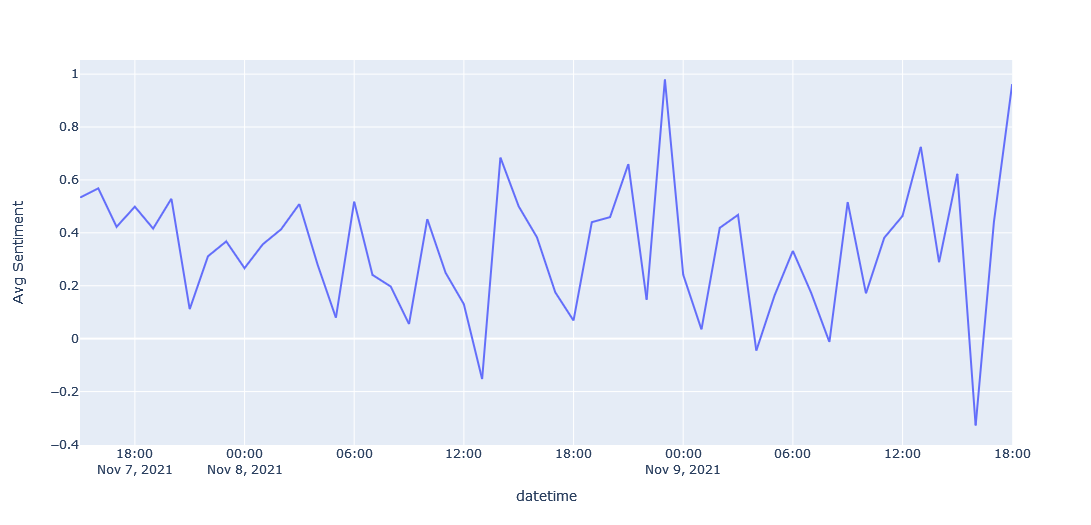